In [9]:
# importing relevant packages 

import torch 
from torchvision import models
import pandas as pd
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import glob
import os
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import json

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
# for i in range(17):
#     print('\'p'+str(i)+'_x\', ', end ='')
#     print('\'p'+str(i)+'_y\', ', end ='')

# for i in range(17):
#     print('p'+str(i)+'_x_arr = []')
#     print('p'+str(i)+'_y_arr = []')

In [12]:
header = ['image_name', 'p1_x', 'p1_y', 'p2_x', 'p2_y', 'p3_x', 'p3_y', 'p4_x', 'p4_y', 'p5_x', 'p5_y', 'p6_x', 'p6_y', 'p7_x', 'p7_y', 'p8_x', 'p8_y', 'p9_x', 'p9_y', 'p10_x', 'p10_y', 'p11_x', 'p11_y', 'p12_x', 'p12_y', 'p13_x', 'p13_y', 'p14_x', 'p14_y', 'p15_x', 'p15_y', 'p16_x', 'p16_y']
image_data = []
image_name_arr = []
p1_x_arr = []
p1_y_arr = []
p2_x_arr = []
p2_y_arr = []
p3_x_arr = []
p3_y_arr = []
p4_x_arr = []
p4_y_arr = []
p5_x_arr = []
p5_y_arr = []
p6_x_arr = []
p6_y_arr = []
p7_x_arr = []
p7_y_arr = []
p8_x_arr = []
p8_y_arr = []
p9_x_arr = []
p9_y_arr = []
p10_x_arr = []
p10_y_arr = []
p11_x_arr = []
p11_y_arr = []
p12_x_arr = []
p12_y_arr = []
p13_x_arr = []
p13_y_arr = []
p14_x_arr = []
p14_y_arr = []
p15_x_arr = []
p15_y_arr = []
p16_x_arr = []
p16_y_arr = []

with open('./Kirigami_dataset_1/Kirigami_labels_1.json', 'r') as f:
    images = json.load(f)
    
    for image in images:

        image_name_arr.append(image['data']['img'][-12:])  # image_name
        p1_x_arr.append(image['annotations'][0]['result'][0]['value']['x'] / 100)
        p1_y_arr.append(image['annotations'][0]['result'][0]['value']['y'] / 100)
        p2_x_arr.append(image['annotations'][0]['result'][1]['value']['x'] / 100)
        p2_y_arr.append(image['annotations'][0]['result'][1]['value']['y'] / 100)
        p3_x_arr.append(image['annotations'][0]['result'][2]['value']['x'] / 100)
        p3_y_arr.append(image['annotations'][0]['result'][2]['value']['y'] / 100)
        p4_x_arr.append(image['annotations'][0]['result'][3]['value']['x'] / 100)
        p4_y_arr.append(image['annotations'][0]['result'][3]['value']['y'] / 100)
        p5_x_arr.append(image['annotations'][0]['result'][4]['value']['x'] / 100)
        p5_y_arr.append(image['annotations'][0]['result'][4]['value']['y'] / 100)
        p6_x_arr.append(image['annotations'][0]['result'][5]['value']['x'] / 100)
        p6_y_arr.append(image['annotations'][0]['result'][5]['value']['y'] / 100)
        p7_x_arr.append(image['annotations'][0]['result'][6]['value']['x'] / 100)
        p7_y_arr.append(image['annotations'][0]['result'][6]['value']['y'] / 100)
        p8_x_arr.append(image['annotations'][0]['result'][7]['value']['x'] / 100)
        p8_y_arr.append(image['annotations'][0]['result'][7]['value']['y'] / 100)
        p9_x_arr.append(image['annotations'][0]['result'][8]['value']['x'] / 100)
        p9_y_arr.append(image['annotations'][0]['result'][8]['value']['y'] / 100)
        p10_x_arr.append(image['annotations'][0]['result'][9]['value']['x'] / 100)
        p10_y_arr.append(image['annotations'][0]['result'][9]['value']['y'] / 100)
        p11_x_arr.append(image['annotations'][0]['result'][10]['value']['x'] / 100)
        p11_y_arr.append(image['annotations'][0]['result'][10]['value']['y'] / 100)
        p12_x_arr.append(image['annotations'][0]['result'][11]['value']['x'] / 100)
        p12_y_arr.append(image['annotations'][0]['result'][11]['value']['y'] / 100)
        p13_x_arr.append(image['annotations'][0]['result'][12]['value']['x'] / 100)
        p13_y_arr.append(image['annotations'][0]['result'][12]['value']['y'] / 100)
        p14_x_arr.append(image['annotations'][0]['result'][13]['value']['x'] / 100)
        p14_y_arr.append(image['annotations'][0]['result'][13]['value']['y'] / 100)
        p15_x_arr.append(image['annotations'][0]['result'][14]['value']['x'] / 100)
        p15_y_arr.append(image['annotations'][0]['result'][14]['value']['y'] / 100)
        p16_x_arr.append(image['annotations'][0]['result'][15]['value']['x'] / 100)
        p16_y_arr.append(image['annotations'][0]['result'][15]['value']['y'] / 100)     
        

image_data = pd.concat([pd.Series(image_name_arr), pd.Series(p1_x_arr), pd.Series(p1_y_arr), pd.Series(p2_x_arr), pd.Series(p2_y_arr), pd.Series(p3_x_arr), pd.Series(p3_y_arr), pd.Series(p4_x_arr), pd.Series(p4_y_arr), pd.Series(p5_x_arr), pd.Series(p5_y_arr), pd.Series(p6_x_arr), pd.Series(p6_y_arr), pd.Series(p7_x_arr), pd.Series(p7_y_arr), pd.Series(p8_x_arr), pd.Series(p8_y_arr), pd.Series(p9_x_arr), pd.Series(p9_y_arr), pd.Series(p10_x_arr), pd.Series(p10_y_arr), pd.Series(p11_x_arr), pd.Series(p11_y_arr), pd.Series(p12_x_arr), pd.Series(p12_y_arr), pd.Series(p13_x_arr), pd.Series(p13_y_arr), pd.Series(p14_x_arr), pd.Series(p14_y_arr), pd.Series(p15_x_arr), pd.Series(p15_y_arr), pd.Series(p16_x_arr), pd.Series(p16_y_arr)], axis=1, keys=header)
print(image_data.shape)
print(image_data.head(3))
print(image_data.iloc[10])


(100, 33)
     image_name      p1_x      p1_y      p2_x      p2_y      p3_x      p3_y  \
0  image000.jpg  0.278689  0.375000  0.505464  0.283981  0.722222  0.416262   
1  image001.jpg  0.192095  0.443210  0.422749  0.359039  0.636019  0.489254   
2  image002.jpg  0.301376  0.553748  0.525652  0.465886  0.745770  0.600118   

       p4_x      p4_y      p5_x  ...     p12_x     p12_y     p13_x     p13_y  \
0  0.722222  0.618932  0.495446  ...  0.534608  0.662621  0.551002  0.582524   
1  0.637915  0.685209  0.415166  ...  0.456872  0.739570  0.470142  0.657396   
2  0.754010  0.801074  0.512704  ...  0.558611  0.855238  0.572736  0.765750   

      p14_x     p14_y     p15_x     p15_y     p16_x     p16_y  
0  0.557377  0.507282  0.552823  0.439320  0.540984  0.360437  
1  0.477725  0.581542  0.473934  0.510746  0.459716  0.432364  
2  0.578622  0.691176  0.571559  0.617388  0.558611  0.538890  

[3 rows x 33 columns]
image_name    image010.jpg
p1_x              0.280284
p1_y              0

In [13]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')

In [14]:
image_data.iloc[0]['image_name']

'image000.jpg'

In [15]:
img_arr = cv2.imread(os.path.join(images_dir, image_data.iloc[0]['image_name']))

In [16]:
img_arr.shape

(1944, 2592, 3)

In [17]:
# img = cv2.resize(img_arr, (224,224))
# img_tensor = transforms.ToTensor()(img)
# print(img_tensor.shape)
# img_mean = img_tensor.mean(dim = (1,2))
# img_std = img_tensor.std(dim = (1,2))

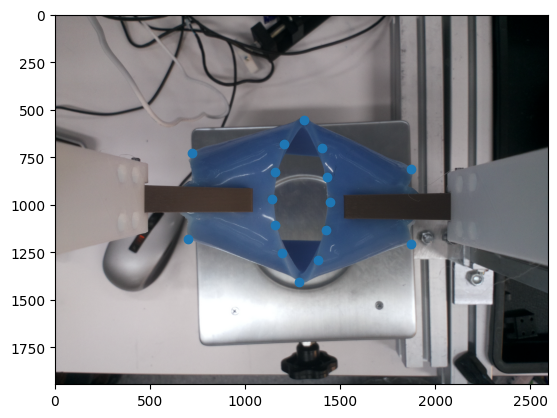

In [18]:
plt.imshow(img_arr)
x_points = image_data.iloc[0][1:][::2]
y_points = image_data.iloc[0][2:][::2]
x_width = img_arr.shape[1]
y_height = img_arr.shape[0]

plt.scatter(x_points*x_width, y_points*y_height)

In [19]:
class ImageDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.df.iloc[idx, 1:]
        image = self.transform_image(image)
        return image.to(device), torch.tensor(label).to(device)
    
    def __len__(self):
        return self.df.shape[0]
    
    def transform_image(self, img):
        img = cv2.resize(img, (224,224))
        img_tensor = transforms.ToTensor()(img)
        img_mean = img_tensor.mean(dim = (1,2))
        img_std = img_tensor.std(dim = (1,2))
        
        img_normalised = transforms.Normalize(img_mean, img_std)(img_tensor)
        return img_normalised
    
    def load_img(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        img = cv2.imread(img_path)
        return img
    

In [20]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')
print(images_dir)

/home/dell/Desktop/xxxx/Uni/Kirigami_project/Keypoint_detection_notebooks/Kirigami_dataset_1


In [21]:
train_df, test_df = train_test_split(image_data, test_size=0.04)

In [22]:
print(train_df.shape)
print(test_df.shape)

(96, 33)
(4, 33)


In [23]:
train_dataset = ImageDataset(train_df, images_dir)
test_dataset = ImageDataset(test_df, images_dir)

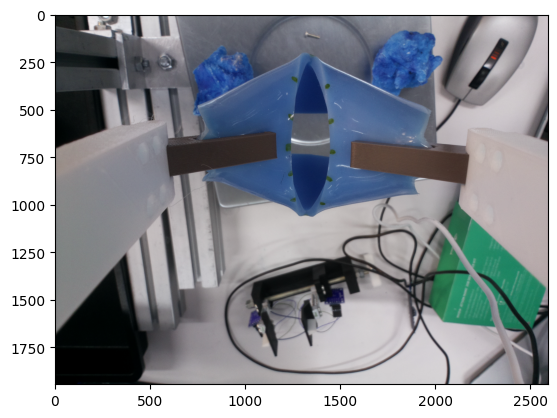

In [24]:
img = test_dataset.load_img(0)
plt.imshow(img)

In [25]:
img_tensor, labels = train_dataset[0]

In [26]:
labels

tensor([0.2846, 0.3491, 0.5012, 0.2591, 0.7091, 0.3883, 0.7061, 0.5753, 0.4925,
        0.6688, 0.2780, 0.5601, 0.4666, 0.3135, 0.4539, 0.3906, 0.4477, 0.4619,
        0.4525, 0.5344, 0.4644, 0.6069, 0.5275, 0.6227, 0.5376, 0.5438, 0.5438,
        0.4725, 0.5403, 0.4041, 0.5319, 0.3269], device='cuda:0',
       dtype=torch.float64)

In [27]:
img_tensor

tensor([[[ 0.7273,  0.7700,  0.8555,  ..., -1.5644, -1.5644, -1.5502],
         [ 0.7843,  0.7843,  0.8412,  ..., -1.5502, -1.5644, -1.5502],
         [ 0.7985,  0.8412,  0.8128,  ..., -1.5644, -1.5644, -1.5644],
         ...,
         [-1.5502, -1.5644, -1.5644,  ..., -1.4648, -1.4505, -1.4932],
         [-1.5644, -1.5502, -1.5644,  ..., -1.4220, -1.5075, -1.4790],
         [-1.5644, -1.5644, -1.5502,  ..., -1.4505, -1.4790, -1.5644]],

        [[ 0.6738,  0.7050,  0.7828,  ..., -1.6922, -1.6922, -1.6611],
         [ 0.7050,  0.7050,  0.7672,  ..., -1.6611, -1.6767, -1.6455],
         [ 0.7672,  0.8139,  0.7361,  ..., -1.6767, -1.6767, -1.6922],
         ...,
         [-1.6300, -1.6767, -1.6455,  ..., -1.3809, -1.4276, -1.3809],
         [-1.6455, -1.6300, -1.6144,  ..., -1.3498, -1.4899, -1.3809],
         [-1.6611, -1.6767, -1.6300,  ..., -1.3498, -1.4432, -1.4899]],

        [[ 0.7001,  0.6675,  0.7001,  ..., -1.8170, -1.8497, -1.7843],
         [ 0.6675,  0.6511,  0.6675,  ..., -1

In [28]:
img_np = img_tensor.cpu().numpy()
img_np

array([[[ 0.7273465 ,  0.77004963,  0.85545605, ..., -1.564392  ,
         -1.564392  , -1.5501575 ],
        [ 0.78428406,  0.78428406,  0.84122163, ..., -1.5501575 ,
         -1.564392  , -1.5501575 ],
        [ 0.7985184 ,  0.84122163,  0.81275284, ..., -1.564392  ,
         -1.564392  , -1.564392  ],
        ...,
        [-1.5501575 , -1.564392  , -1.564392  , ..., -1.4647512 ,
         -1.4505168 , -1.49322   ],
        [-1.564392  , -1.5501575 , -1.564392  , ..., -1.422048  ,
         -1.5074544 , -1.4789855 ],
        [-1.564392  , -1.564392  , -1.5501575 , ..., -1.4505168 ,
         -1.4789855 , -1.564392  ]],

       [[ 0.6738413 ,  0.70497376,  0.78280497, ..., -1.6922268 ,
         -1.6922268 , -1.6610943 ],
        [ 0.70497376,  0.70497376,  0.76723874, ..., -1.6610943 ,
         -1.6766605 , -1.6455281 ],
        [ 0.76723874,  0.8139374 ,  0.7361063 , ..., -1.6766605 ,
         -1.6766605 , -1.6922268 ],
        ...,
        [-1.6299618 , -1.6766605 , -1.6455281 , ..., -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 224, 224)
(224, 224, 3)


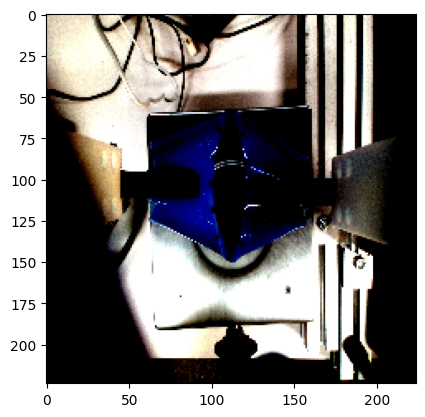

In [29]:
print(img_np.shape)
img_np_reverted = np.transpose(img_np, (1,2,0))
print(img_np_reverted.shape)
plt.imshow(img_np_reverted, clim=(-1, 1))

In [30]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

In [31]:
for img, points in train_dataloader:
  print(img.shape)
  print(points.shape)
  break

torch.Size([8, 3, 224, 224])
torch.Size([8, 32])


In [24]:
# class VGG_model(nn.Module):
#     def __init__(self):
#         super(VGG_model, self).__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
#             nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
#             nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
#             nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
#             nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#             nn.LeakyReLU(0.1,inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
#         )
        
#         self.avgpool = nn.Sequential(
#             nn.Conv2d(512,512, kernel_size=3, padding='same'),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(512,50, kernel_size=3, padding='same'),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.AdaptiveAvgPool2d(output_size=(8,8))
#         )
        
#         self.classifier = nn.Sequential(
#             nn.Linear(3200, 300),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(300, 6),
#             nn.Sigmoid()
#         )
    
#     def forward(self, x):
#         x = self.features(x)
#         x = self.avgpool(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x
        

In [76]:
from torchvision.models import resnet50
model = resnet50(pretrained=False)

In [77]:
# # making the weights non trainable

# for param in model.parameters():
#   param.requires_grad = False

In [78]:
from torch.nn.modules.activation import Sigmoid
from torch.nn.modules.pooling import AdaptiveAvgPool2d
# pool_layer = nn.Sequential(
#      nn.Conv2d(512,512, kernel_size=3, padding='same'),
#      nn.ReLU(inplace=True),
#      nn.MaxPool2d(kernel_size=2, stride=2),
#      nn.Conv2d(512,50, kernel_size=3, padding='same'),
#      nn.ReLU(inplace=True),
#      nn.MaxPool2d(kernel_size=2, stride=2),
#      nn.AdaptiveAvgPool2d(output_size=(8,8))
# )

# model.avgpool = pool_layer

final_predictor = nn.Sequential(
    nn.Linear(2048, 300),
    nn.ReLU(inplace=True),
    nn.Dropout(0.3),
    nn.Linear(300, 32),
    nn.Sigmoid()
)

model.fc = final_predictor

In [79]:
summary(model, torch.rand(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        128
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]         16,38

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        128
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]         16,38

In [80]:
# getting the optimizer and loss_function 

def get_essentials():
  loss_fun = nn.L1Loss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
  return loss_fun, optimizer

In [81]:
# defining batch_train and accuracy functions


def train_batch(data, model, loss_fun, optimizer):
  model.train()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  loss_val.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss_val.item()

@torch.no_grad()
def val_batch(data, model, loss_fun, optimizer):
  model.eval()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  return loss_val.item()


In [82]:
epochs = 30
loss_fun, optimizer = get_essentials()

In [89]:
# training and validation loops 


train_epoch, val_epoch = [], []
for epoch in tqdm(range(epochs)):
  train_batch_losses, val_batch_losses = [], []
  for data in train_dataloader:
    train_batch_loss = train_batch(data, model, loss_fun, optimizer)
    train_batch_losses.append(train_batch_loss)
  for data in test_dataloader:
    val_batch_loss = val_batch(data, model, loss_fun, optimizer)
    val_batch_losses.append(val_batch_loss)
  train_epoch.append(np.mean(train_batch_losses))
  val_epoch.append(np.mean(val_batch_losses))
  
  print(train_batch_loss, val_batch_loss)

  3%|█▏                                | 1/30 [00:07<03:28,  7.20s/it]

0.039259795294044914 0.048080476062339284


  7%|██▎                               | 2/30 [00:14<03:26,  7.37s/it]

0.04272757983158966 0.04712575909510936


 10%|███▍                              | 3/30 [00:22<03:22,  7.49s/it]

0.03405828642628163 0.07688710481220937


 13%|████▌                             | 4/30 [00:29<03:15,  7.52s/it]

0.05345244355170198 0.09552926551039145


 17%|█████▋                            | 5/30 [00:37<03:07,  7.50s/it]

0.04409549996022877 0.04357984848174201


 20%|██████▊                           | 6/30 [00:44<02:59,  7.49s/it]

0.034428005505366135 0.06631218449006818


 23%|███████▉                          | 7/30 [00:52<02:51,  7.46s/it]

0.05105429143715624 0.07095462836284791


 27%|█████████                         | 8/30 [00:59<02:43,  7.42s/it]

0.04927244677814689 0.06361975643024453


 30%|██████████▏                       | 9/30 [01:07<02:36,  7.45s/it]

0.04704964940287658 0.06626580885604491


 33%|███████████                      | 10/30 [01:14<02:31,  7.55s/it]

0.050964953383063796 0.031635182387035735


 37%|████████████                     | 11/30 [01:22<02:23,  7.57s/it]

0.05060175633948269 0.09885138863775102


 40%|█████████████▏                   | 12/30 [01:30<02:16,  7.59s/it]

0.050579719553933825 0.06762824012866933


 43%|██████████████▎                  | 13/30 [01:37<02:09,  7.60s/it]

0.0796174584795391 0.07496124019238083


 47%|███████████████▍                 | 14/30 [01:45<02:01,  7.61s/it]

0.044385899867496914 0.06486036845117968


 50%|████████████████▌                | 15/30 [01:53<01:54,  7.63s/it]

0.048959683398019246 0.029664610647138177


 53%|█████████████████▌               | 16/30 [02:01<01:48,  7.78s/it]

0.04423311757492409 0.06346143798740415


 57%|██████████████████▋              | 17/30 [02:08<01:40,  7.76s/it]

0.042758550718927556 0.06399958322187563


 60%|███████████████████▊             | 18/30 [02:16<01:32,  7.71s/it]

0.051727253944511754 0.06410734021509151


 63%|████████████████████▉            | 19/30 [02:23<01:24,  7.64s/it]

0.03926808448190674 0.08144128976130328


 67%|██████████████████████           | 20/30 [02:32<01:18,  7.84s/it]

0.042334997318440745 0.07545339940397111


 70%|███████████████████████          | 21/30 [02:39<01:09,  7.76s/it]

0.03673940027022217 0.06217153981193216


 73%|████████████████████████▏        | 22/30 [02:47<01:01,  7.66s/it]

0.04768874367580399 0.07972304533097786


 77%|█████████████████████████▎       | 23/30 [02:54<00:53,  7.59s/it]

0.04904973770894078 0.041020694512701454


 80%|██████████████████████████▍      | 24/30 [03:02<00:45,  7.53s/it]

0.0497737275155504 0.04630814057714456


 83%|███████████████████████████▌     | 25/30 [03:10<00:38,  7.72s/it]

0.053704342674675845 0.06364164601768811


 87%|████████████████████████████▌    | 26/30 [03:18<00:31,  7.87s/it]

0.052231100936337316 0.07157008018568123


 90%|█████████████████████████████▋   | 27/30 [03:25<00:23,  7.76s/it]

0.04323302775269103 0.07229980030293784


 93%|██████████████████████████████▊  | 28/30 [03:33<00:15,  7.56s/it]

0.03698133854280278 0.0898928069448679


 97%|███████████████████████████████▉ | 29/30 [03:40<00:07,  7.41s/it]

0.03567008225533452 0.0506423397598534


100%|█████████████████████████████████| 30/30 [03:47<00:00,  7.57s/it]

0.04078774475137582 0.04152720686270241


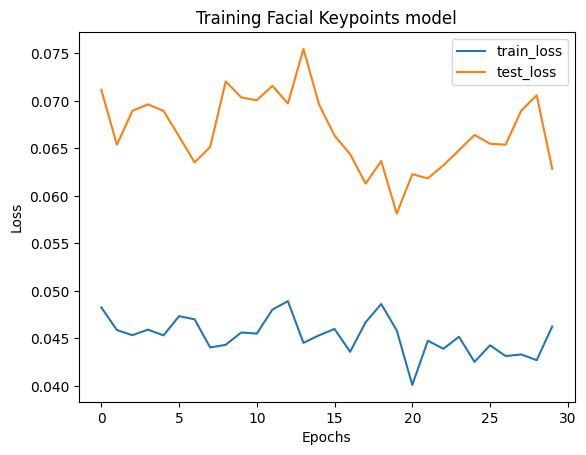

In [90]:
plt.plot(range(epochs), train_epoch, label="train_loss")
plt.plot(range(epochs), val_epoch, label="test_loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Facial Keypoints model")
plt.show()

# Displaying the results

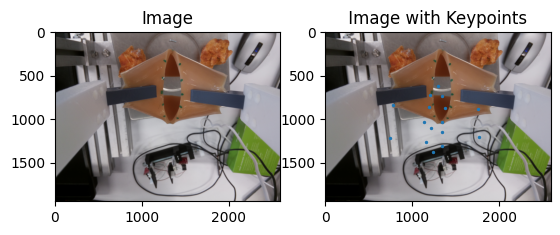

In [91]:
index = 0
test_img, points = test_dataset[index]
Facial_key_points = model(test_img[None]).flatten().detach().cpu()
plt.subplot(121)
plt.title("Image")
img = test_dataset.load_img(index)
img = img[:,:,::-1]                                                              
plt.imshow(img)
plt.subplot(122)
plt.title(" Image with Keypoints ")
plt.imshow(img)
x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
plt.scatter(x_points*img.shape[1], y_points*img.shape[0], s = 2)                          # scaling the keypoints with image dimension
plt.show()

In [ ]:
print(Facial_key_points)

In [ ]:
x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
print(x_points)
print(y_points)

# width = img_arr.shape[0]
# height = img_arr.shape[1]

# plt.scatter(x_points*x_width, y_points*y_height)

In [ ]:
for i in range(10):
    
    folder = 'asdsadsd'
    print(folder + str(i).zfill(2)+'.jpg')